
## Bike Sharing Assignment 

### Model Selection using RFE


### Step 1 : Importing and Understanding Data

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing day.csv
bike_data = pd.read_csv('C:/Users/Arindam/Downloads/day.csv')

In [5]:
# Looking at the first five row
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike_data dataframe

In [6]:
bike_data.shape


(730, 16)

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# dropping unneccessary columns
bike_data.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [10]:
bike_data.replace({'season': {1:'spring',2:'summer',3:'fall',4:'winter'},'mnth':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},'weekday':{0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},'weathersit':{1:'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'}}, inplace=True)

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

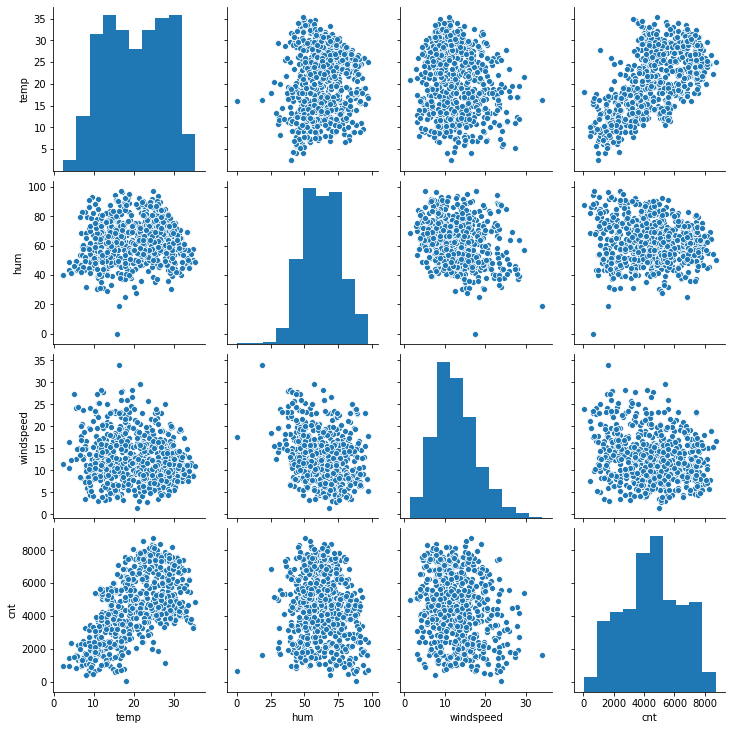

In [12]:
sns.pairplot(data=bike_data[["temp","hum","windspeed","cnt"]])
plt.show()

Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

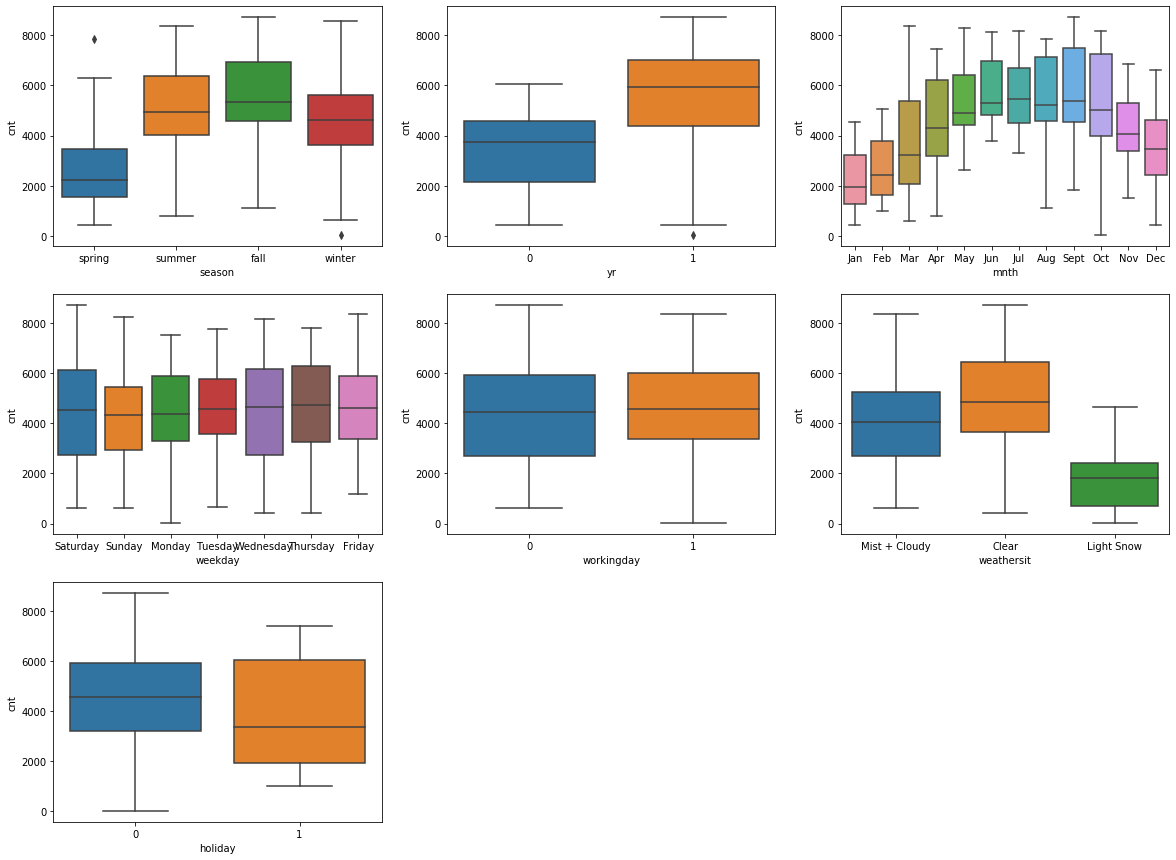

In [13]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.show()

### Step 3 : Data Preparation

### Dummy Variables

The variable like season , mnth , weekday , weathersit has certain no. of levels. We need to convert these levels into integer as well. For this, we will use something called `dummy variables`.

In [14]:
# Get the dummy variables for the category vriables and store it in a new variable - 'status'
status = pd.get_dummies(bike_data['season'],drop_first = True)
status1 = pd.get_dummies(bike_data['mnth'],drop_first = True)
status2 = pd.get_dummies(bike_data['weekday'],drop_first = True)
status3 = pd.get_dummies(bike_data['weathersit'],drop_first = True)

# Checking the dataset 'status' looks like
print(status.head())
print(status1.head())
print(status2.head())
print(status3.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sept
0    0    0    0    1    0    0    0    0    0    0     0
1    0    0    0    1    0    0    0    0    0    0     0
2    0    0    0    1    0    0    0    0    0    0     0
3    0    0    0    1    0    0    0    0    0    0     0
4    0    0    0    1    0    0    0    0    0    0     0
   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       1         0       0         0        0          0
3       0         0       0         0        1          0
4       0         0       0         0        0          1
   Light Snow  Mist + Cloudy
0           0              1
1           0              1
2           0              0
3           0              0
4  

Now, you don't need three columns. You can drop the `season , mnth , weekday , weathersit` column .

In [15]:
# Add the results to the original housing dataframe

bike_data = pd.concat([bike_data, status, status1, status2, status3], axis = 1)

In [16]:
# Now let's see the head of our dataframe.

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [17]:
# Drop 'season , mnth , weekday , weathersit'  columns as we have created the dummies for it
bike_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Step 4 : Splitting the Data into Training and Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

### A) Rescaling the Features 

We will use MinMax scaling.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


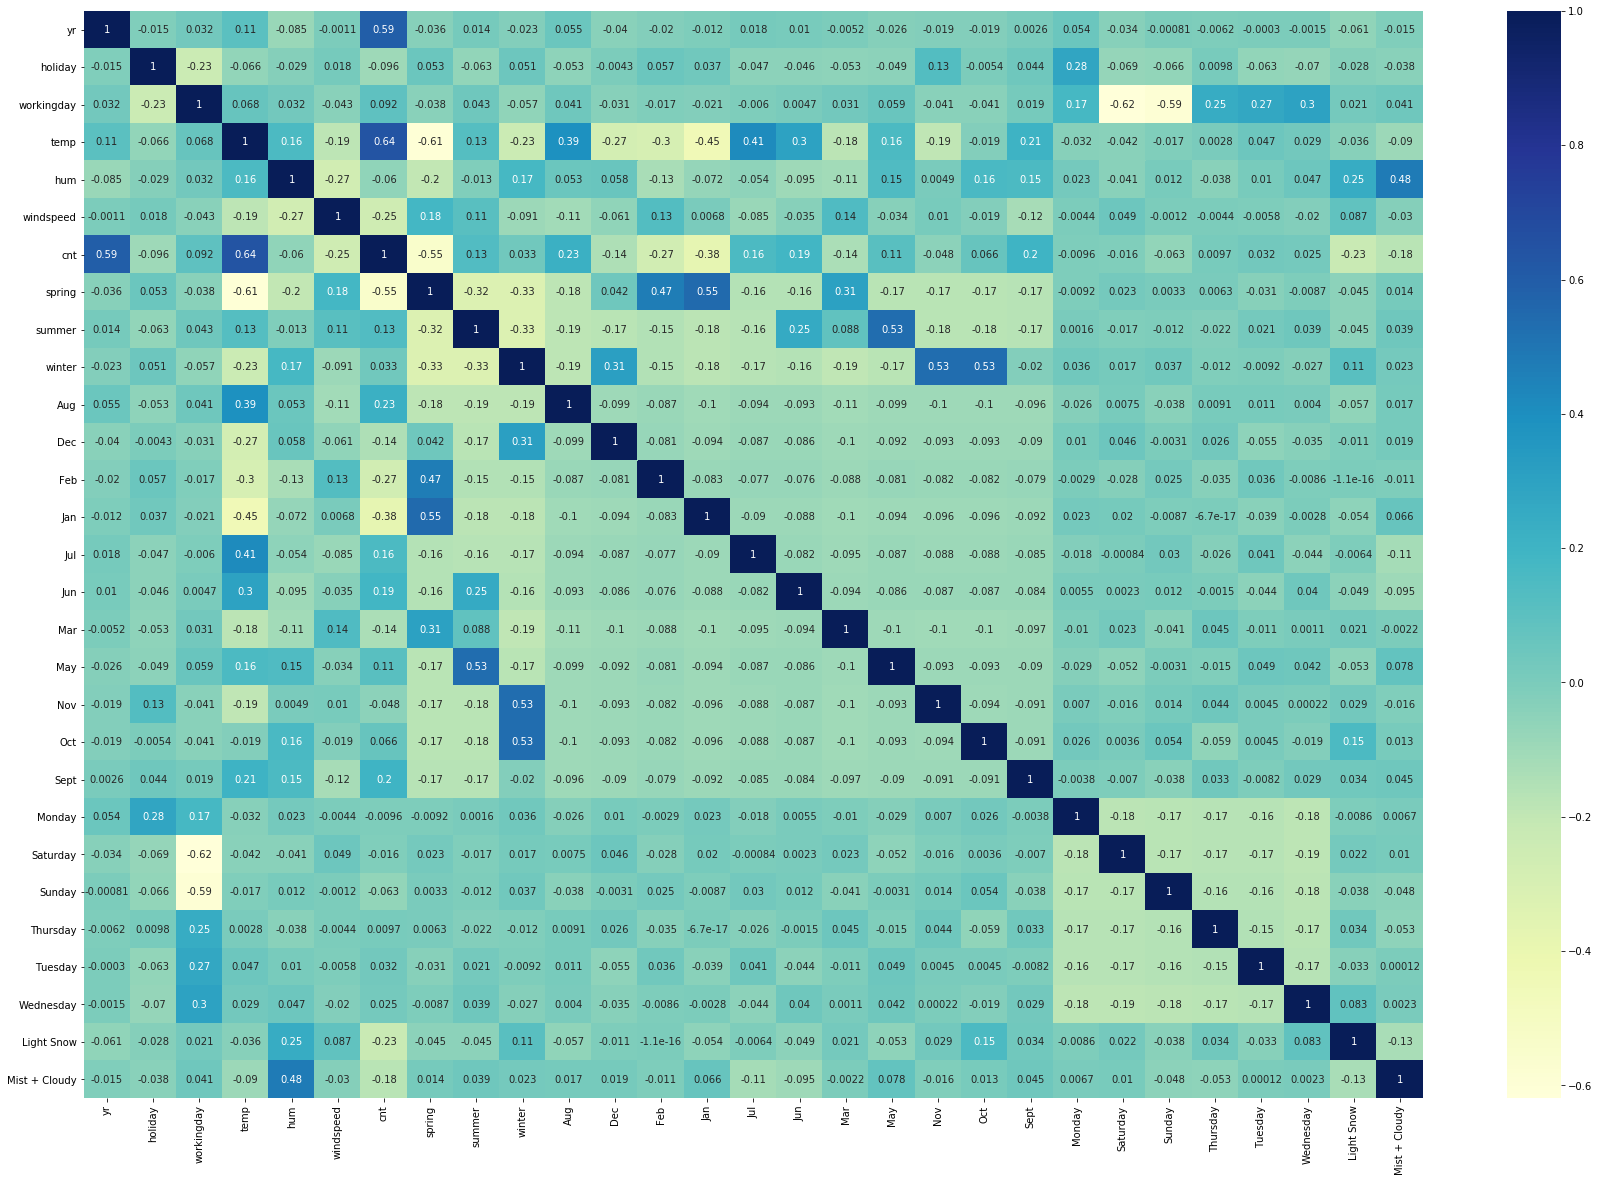

In [22]:
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### B) Dividing into X and Y sets for the model building

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sept', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

### Step 4 : Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [24]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [25]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sept', True, 1),
 ('Monday', False, 7),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 10),
 ('Tuesday', False, 8),
 ('Wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1)]

In [27]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sept', 'Saturday', 'Sunday', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [28]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Step 5 : Building model using statsmodel, for the detailed statistics

In [29]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [30]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [31]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()   

In [32]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        20:00:47   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1989      0.028      7.181

##### We will drop the variables/const with high p-value and variables with high VIF's

We will drop the features/variables one by one

In [31]:
X_train_new = X_train[col].drop(["holiday"], axis = 1)
X_train_new.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Jul', 'Sept', 'Saturday', 'Sunday', 'Light Snow',
       'Mist + Cloudy'],
      dtype='object')

In [32]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)


In [33]:
# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm).fit()  

#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        01:16:12   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1799      0.042      4.276

In [34]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [35]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,Saturday,4.91
4,windspeed,4.90
5,spring,4.80
11,Sunday,4.76
7,winter,3.71
6,summer,3.03
13,Mist + Cloudy,2.31


In [36]:
X_train_new1 = X_train_lm.drop(["hum"], axis = 1)
X_train_new1.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jul', 'Sept', 'Saturday', 'Sunday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [37]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [38]:
lm3 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          5.73e-189
Time:                        01:16:19   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1005      0.038      2.618

In [39]:
X_train_lm = X_train_lm.drop(['const'], axis=1)

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,Saturday,4.45
10,Sunday,4.21
4,spring,3.82
6,winter,2.80
5,summer,2.75
0,yr,2.07
7,Jul,1.60


In [41]:
X_train_new2 = X_train_new1.drop(["workingday"], axis = 1)
X_train_new2.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Jul', 'Sept',
       'Saturday', 'Sunday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)


In [43]:
# Running the linear model
lm4 = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.01e-186
Time:                        01:16:23   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2005      0.030      6.771

In [44]:
X_train_new3 = X_train_new2.drop(["Saturday"], axis = 1)
X_train_new3.columns

Index(['yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Jul', 'Sept',
       'Sunday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_lm).fit()   

#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.65e-187
Time:                        01:16:24   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2036      0.030      6.889

In [46]:
X_train_lm1 = X_train_lm.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,summer,2.22
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,Jul,1.59
10,Mist + Cloudy,1.55
7,Sept,1.33
8,Sunday,1.17


In [48]:
X_train_lm.columns

Index(['const', 'yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Jul',
       'Sept', 'Sunday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [49]:
y_train_cnt = lm5.predict(X_train_lm)

In [50]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

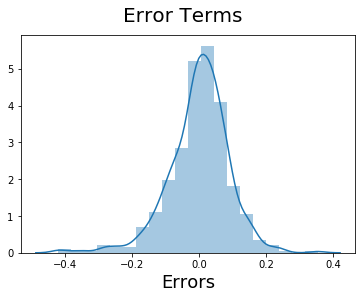

In [51]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

we can see the error term are normally distributed 
and  residuals have mean value of zero .


## Making Predictions

#### Applying the scaling on the test sets

In [52]:
num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm1.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [55]:
X_test_new.columns

Index(['const', 'yr', 'temp', 'windspeed', 'spring', 'summer', 'winter', 'Jul',
       'Sept', 'Sunday', 'Light Snow', 'Mist + Cloudy'],
      dtype='object')

In [56]:
# Making predictions
y_pred = lm5.predict(X_test_new)

In [85]:
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          1.65e-187
Time:                        05:44:06   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2036      0.030      6.889      0.000       0.146       0.262
yr                0.2338      0.008     28.423      0.000       0.218       0.250
temp              0.4923      0.033     14.832      0.000       0.427       0.557
windspeed        -0.1498      0.025     -5.970      0.000      -0.199      -0.100
spring           -0.0680      0.021     -3.219      0.001      -0.109      -0.026
summer            0.0467      0.015      3.067      0.002       0.017       0.077
winter            0.0831      0.017      4.824      0.000       0.049       0.117
Jul              -0.0486      0.019     -2.607      0.009      -0.085      -0.012
Sept              0.0721      0.017      4.253      0.000       0.039       0.105
Sunday           -0.0451      0.012     -3.862      0.000      -0.068      -0.022
Light Snow       -0.2856      0.025    -11.560      0.000      -0.334      -0.237
Mist + Cloudy    -0.0816      0.009     -9.311      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       76.151   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.716
Skew:                          -0.733   Prob(JB):                     7.85e-46
Kurtosis:                       5.762   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.805407680173852

## Model Evaluation

In [57]:
print(y_test.shape)
print(y_pred.shape)

(219,)
(219,)


Text(0, 0.5, 'y_pred')

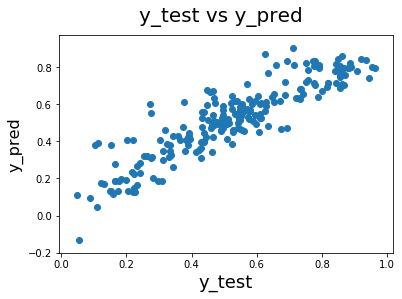

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

$ cnt = 0.2036 + 0.2338  \times  yr + 0.4923  \times  temp - 0.1498 \times windspeed - 0.0680 \times spring + 0.0467 \times summer + 0.0831 \times winter - 0.0486 \times Jul + 0.0721 \times Sept - 0.0451 \times Sunday - 0.2856 \times Light Snow - 0.0816 \times Mist + Cloudy $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a some options:
1. Add new features (holiday/hum , etc.)
2. Build a non-linear model